In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def draw(nb_list):
    for nb in nb_list:
        data_lamb, data_seed, data_error = [], [], []

        f = open(f"sweep_lamb_noisy_{nb}blocks_t=1.txt")
        for line in f.readlines():
            line = line.strip().replace("#blocks =", "").replace("lamb =", "").replace(
                "t =", "").replace("seed =", "").replace("error =", "").replace(",", "")
            _, lamb, _, seed, error = line.split()
            data_lamb.append(int(lamb))
            data_seed.append(int(seed))
            data_error.append(float(error))
        f.close()

        df = pd.DataFrame(data={
            "lamb": data_lamb,
            "seed": data_seed,
            "error": data_error
        })

        assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))
        assert np.all(df.groupby("lamb")["lamb"].count().to_numpy() == 50)

        newdf = df.groupby("lamb")["error"].agg(['mean', 'std']).reset_index()
        lamb_arr = newdf["lamb"].to_numpy()
        mean_arr = newdf["mean"].to_numpy()
        std_arr = newdf["std"].to_numpy()

        plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                     label=f'{nb} blocks',
                     fmt='o', markersize=3)

        lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
        plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
                label='fitted line (slope$={:.3f}$)'.format(lr.slope),
                color=plt.gca().lines[-1].get_color(),
                linestyle="--")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\lambda_{\mathrm{pen}}$")
    plt.ylabel("error")
    plt.title(r"$t=1$")
    plt.legend(prop={'size': 8})
    plt.grid()
    plt.savefig("sweep_lamb_noisy_t=1.pdf", format="pdf", bbox_inches="tight")
    plt.show()

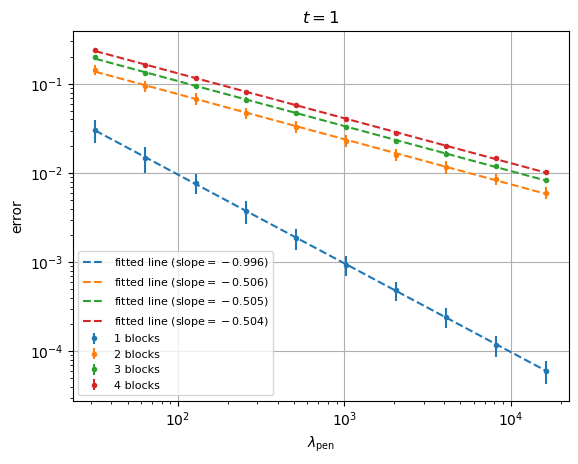

In [3]:
draw([1,2,3,4])